In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
testData = pd.read_csv('data/test.csv')
trainData = pd.read_csv('data/train.csv')
storeData = pd.read_csv('data/store.csv')
sampleData = pd.read_csv('data/sample_submission.csv')

C:\Users\Yunus\AppData\Local\Temp\ipykernel_7344\664267924.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  trainData = pd.read_csv('data/train.csv')


In [3]:
testData.shape

(41088, 8)

In [4]:
sampleData.shape

(41088, 2)

## Task 1

In [8]:
def summarize_data(df):
    # Basic Information
    print("Basic Information:")
    df.info()  # info prints directly
    print(df.describe(include='all'))
    print(df.isnull().sum())

    # Specific Summarizations
    print("\nSpecific Summarizations:")
    print(f'Number of records: {df.shape[0]}')
    print('Number of unique values per column:')
    print(df.nunique())

    for column in df.columns:
        col = df[column]
        if col.dtype == 'object':
            print(f'\nTop 5 most frequent values in column "{column}":')
            print(col.value_counts().head())
        elif col.dtype in ['int64', 'float64']:
            total = col.sum()
            mean = col.mean()
            print(f'\nTotal of column "{column}": {total}')
            print(f'Mean of column "{column}": {mean:.2f}')
            # Use try/except to check if conversion to datetime is possible without extra computations
            try:
                dt_series = pd.to_datetime(col, errors='raise')
                messages_per_period = dt_series.dt.to_period('M').value_counts().sort_index()
                print(f'\nNumber of records per month for column "{column}":')
                print(messages_per_period)
            except Exception:
                pass

    numeric_columns = df.select_dtypes(include=['number'])
    if not numeric_columns.empty:
        first_numeric = numeric_columns.columns[0]
        top_records = df.nlargest(5, first_numeric)
        print('\nTop 5 records by the first numerical column:')
        print(top_records)
    else:
        print('\nNo numerical columns to display top records.')


In [10]:
summarize_data(testData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB
                  Id         Store     DayOfWeek        Date          Open  \
count   41088.000000  41088.000000  41088.000000       41088  41077.000000   
unique           NaN           NaN           NaN          48           NaN   
top              NaN           NaN           NaN  2015-09-17           NaN   
freq             NaN           NaN           NaN         85

In [11]:
summarize_data(storeData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
             Store StoreType Assortment  CompetitionDistance  \
count   1115.00000      1115       1115          1112.000000   
unique     

In [9]:
summarize_data(trainData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  datetime64[ns]
 1   DayOfWeek      1017209 non-null  datetime64[ns]
 2   Date           1017209 non-null  object        
 3   Sales          1017209 non-null  datetime64[ns]
 4   Customers      1017209 non-null  datetime64[ns]
 5   Open           1017209 non-null  datetime64[ns]
 6   Promo          1017209 non-null  datetime64[ns]
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  datetime64[ns]
dtypes: datetime64[ns](7), object(2)
memory usage: 69.8+ MB
                                Store                      DayOfWeek  \
count                         1017209                        1017209   
unique                            NaN                            NaN   
top       

In [15]:
# lets see on four data missing values and drop them

trainData = trainData.dropna()
storeData = storeData.dropna() 

summarize_data(storeData)
summarize_data(trainData)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 1 to 1110
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      365 non-null    int64  
 1   StoreType                  365 non-null    object 
 2   Assortment                 365 non-null    object 
 3   CompetitionDistance        365 non-null    float64
 4   CompetitionOpenSinceMonth  365 non-null    float64
 5   CompetitionOpenSinceYear   365 non-null    float64
 6   Promo2                     365 non-null    int64  
 7   Promo2SinceWeek            365 non-null    float64
 8   Promo2SinceYear            365 non-null    float64
 9   PromoInterval              365 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 31.4+ KB
              Store StoreType Assortment  CompetitionDistance  \
count    365.000000       365        365           365.000000   
unique         

In [20]:
def univariate_analysis(df):
    for col_name, column in df.items():
        print(f"Analysis for column: {col_name}")
        fig, ax = plt.subplots(figsize=(10, 6))
        
        if pd.api.types.is_numeric_dtype(column):
            sns.histplot(column, kde=True, bins=30, ax=ax)
            ax.set(title=f'Histogram of {col_name}', xlabel=col_name, ylabel='Frequency')
        elif pd.api.types.is_datetime64_any_dtype(column):
            column.value_counts().sort_index().plot(kind='line', ax=ax)
            ax.set(title=f'Time Series of {col_name}', xlabel='Date', ylabel='Frequency')
        else:
            column.value_counts().plot(kind='bar', ax=ax)
            ax.set(title=f'Bar Plot of {col_name}', xlabel=col_name, ylabel='Frequency')
        
        plt.show()
        print("\n")


Analysis for column: Store


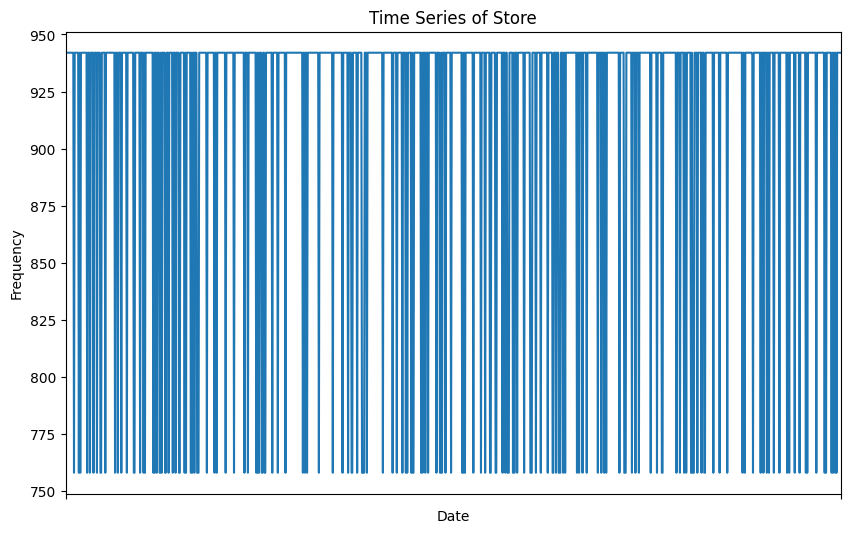



Analysis for column: DayOfWeek


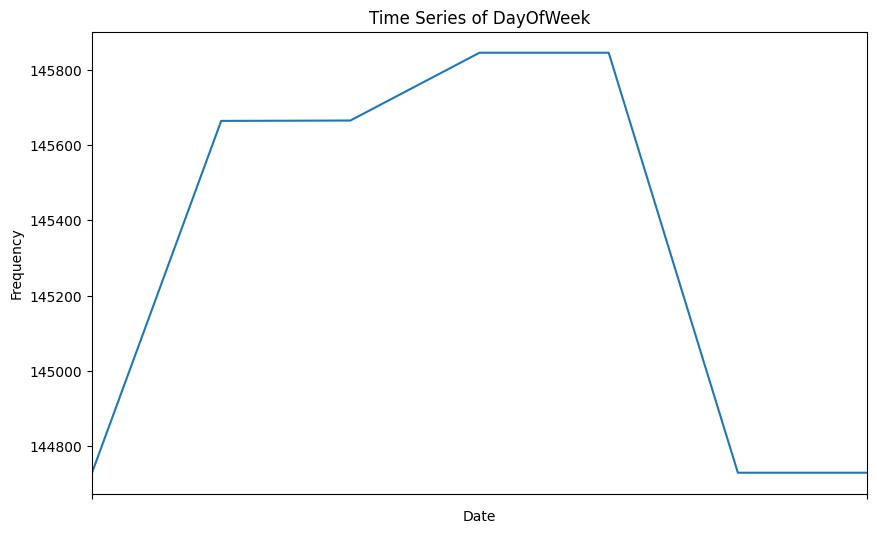



Analysis for column: Date


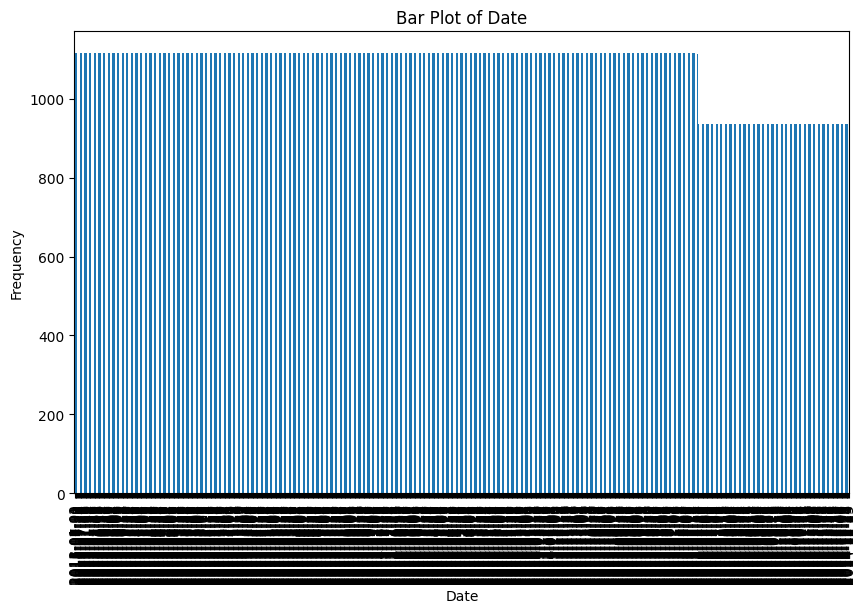



Analysis for column: Sales


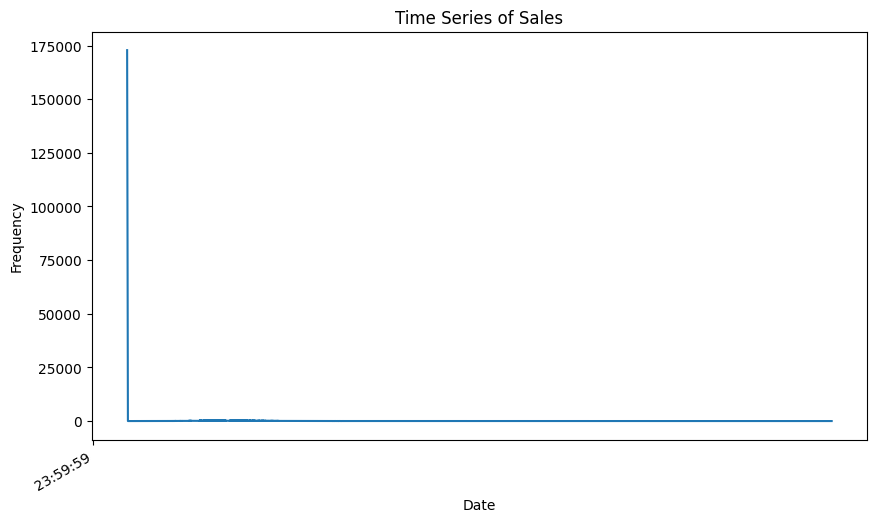



Analysis for column: Customers


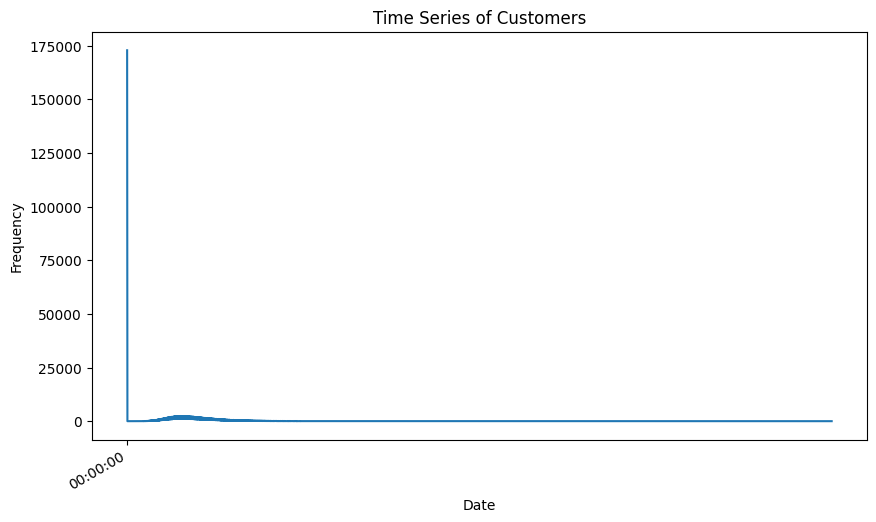



Analysis for column: Open


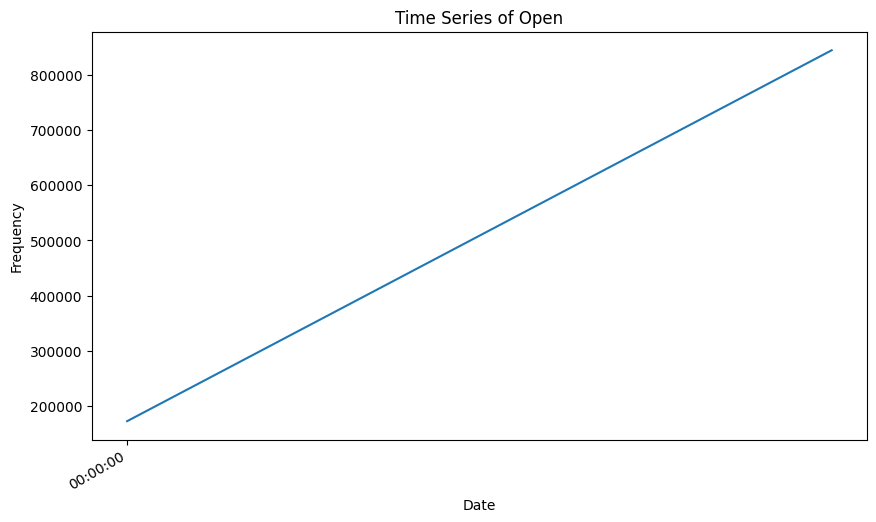



Analysis for column: Promo


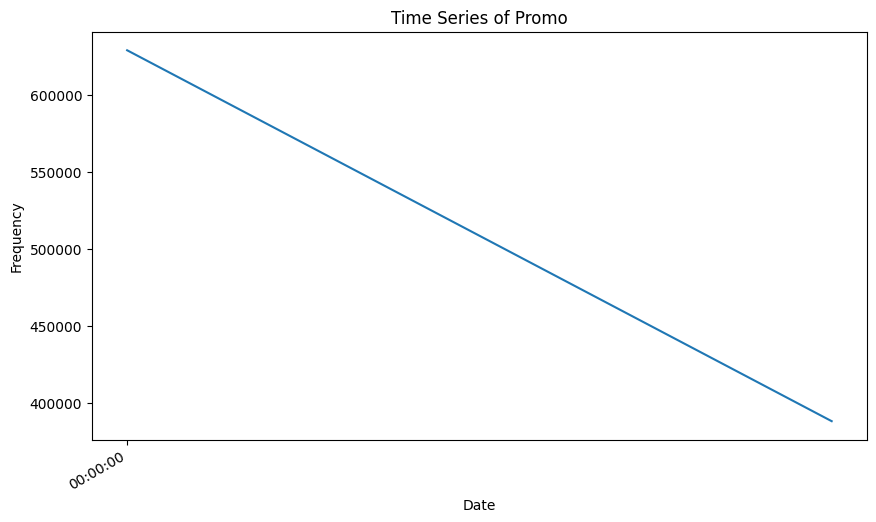



Analysis for column: StateHoliday


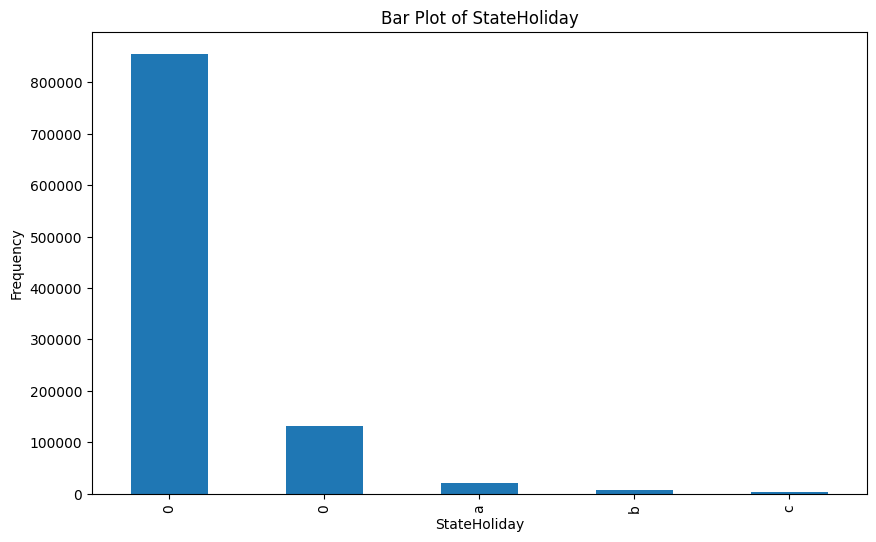



Analysis for column: SchoolHoliday


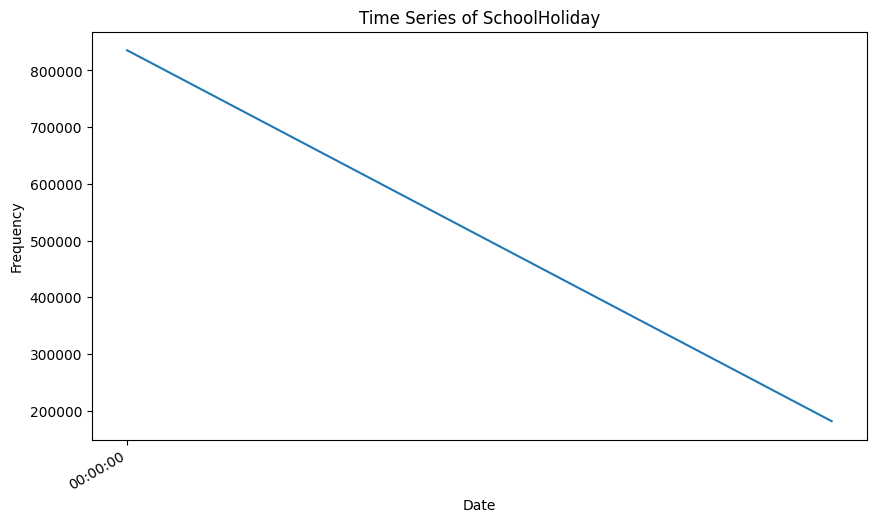

In [21]:
univariate_analysis(trainData)

Analysis for column: Id


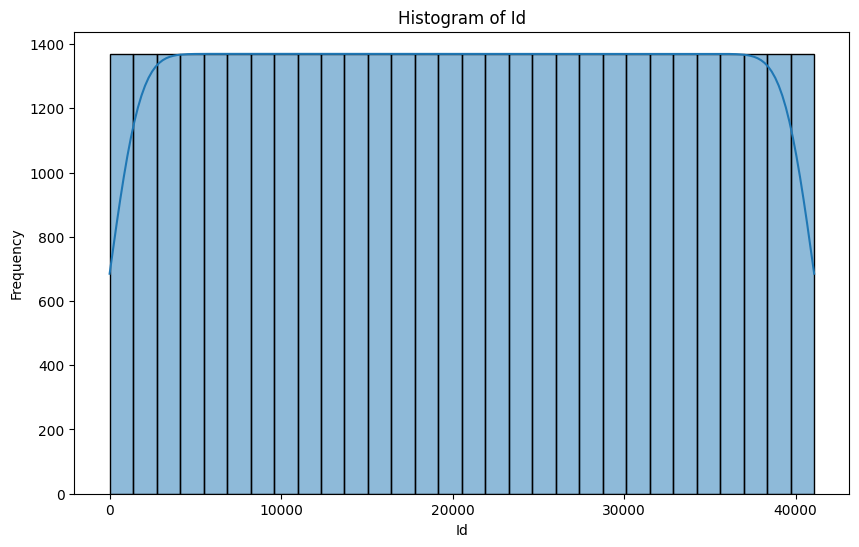



Analysis for column: Store


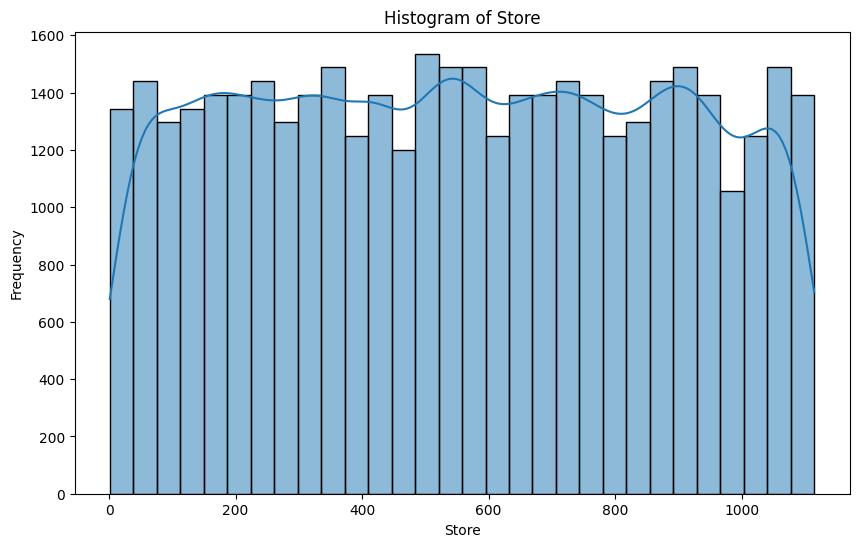



Analysis for column: DayOfWeek


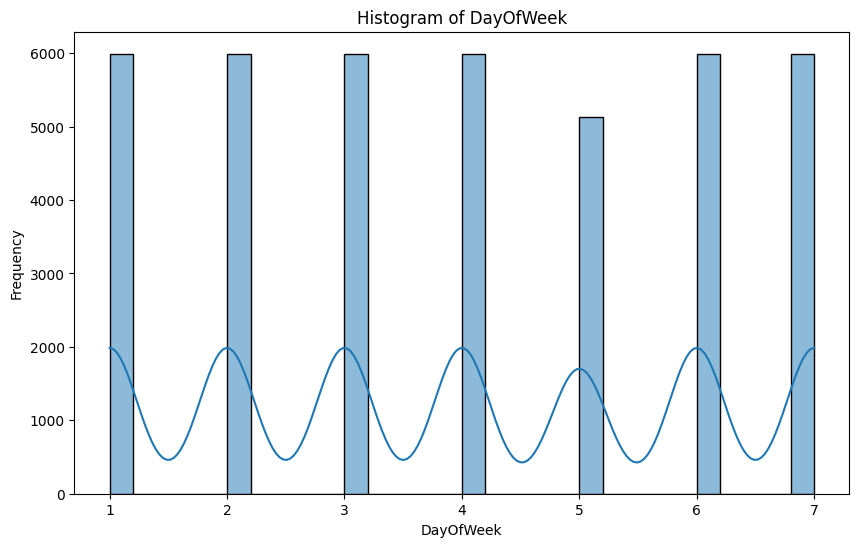



Analysis for column: Date


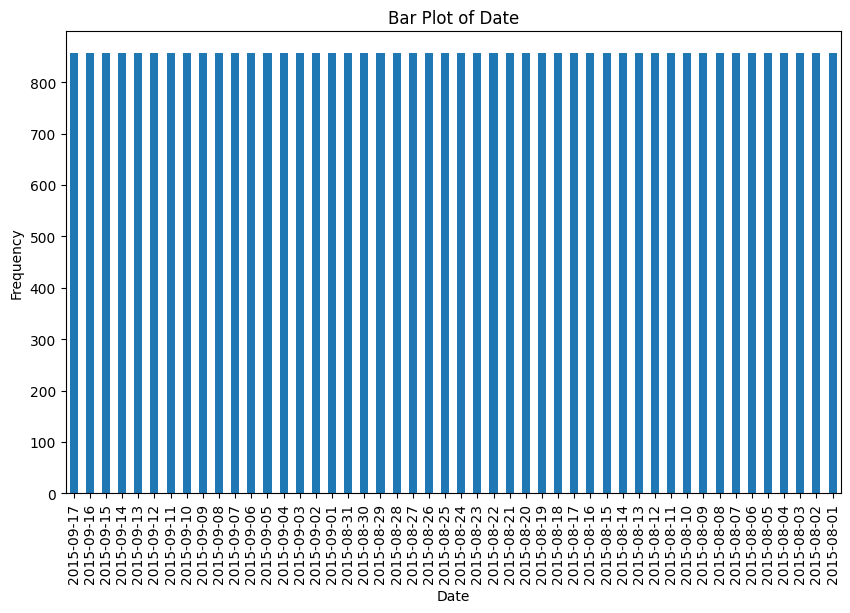



Analysis for column: Open


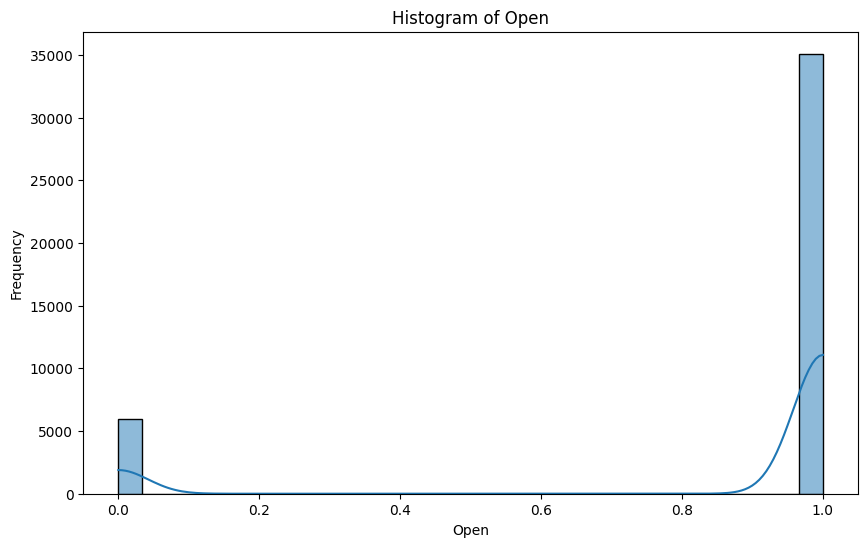



Analysis for column: Promo


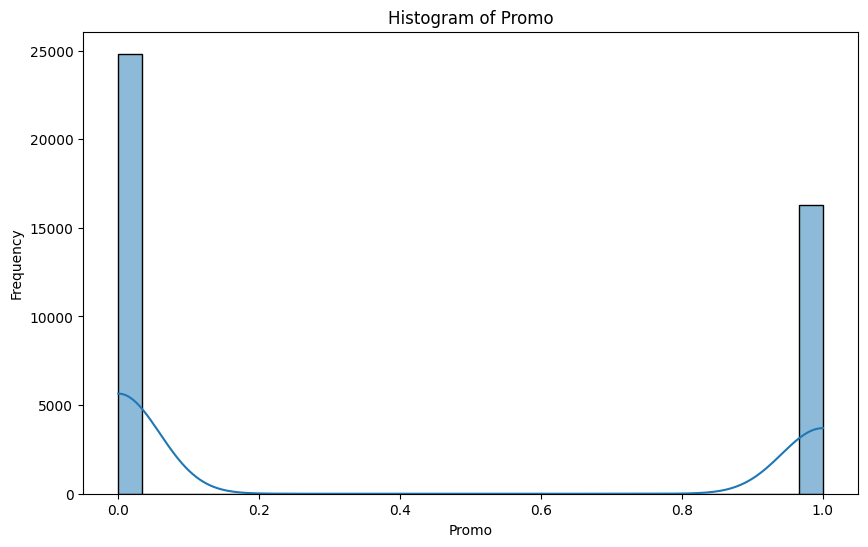



Analysis for column: StateHoliday


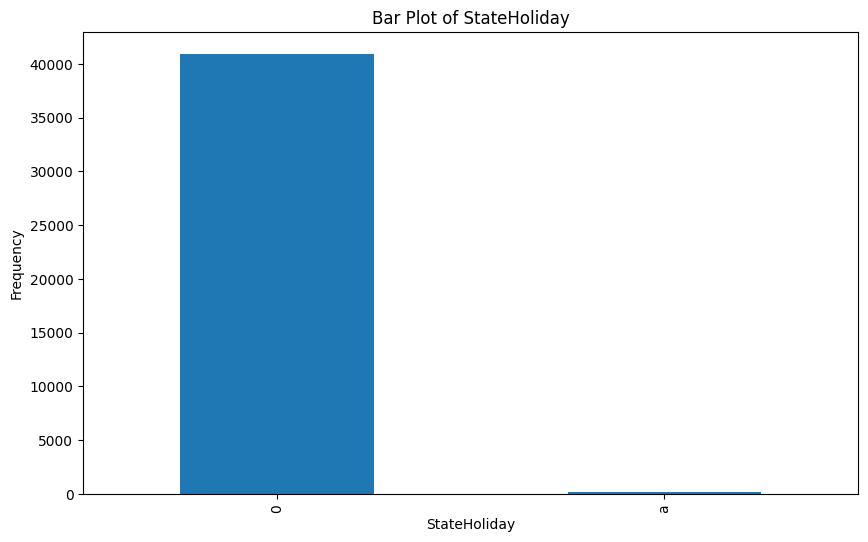



Analysis for column: SchoolHoliday


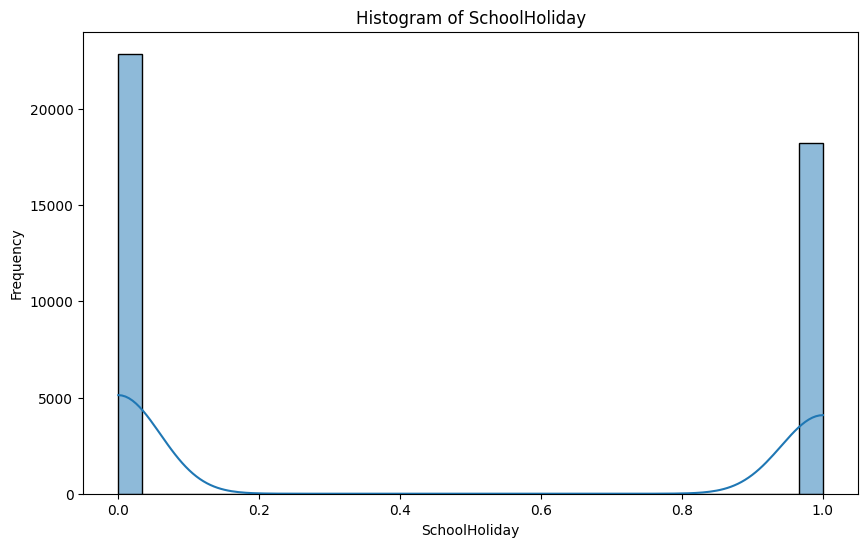

In [22]:
univariate_analysis(testData)

In [23]:
#Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

train_promo = trainData['Promo'].value_counts(normalize=True)
test_promo = testData['Promo'].value_counts(normalize=True)

print(train_promo)
print(test_promo)

Promo
1970-01-01 00:00:00.000000000    0.618485
1970-01-01 00:00:00.000000001    0.381515
Name: proportion, dtype: float64
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64


In [28]:
# Check & compare sales behavior before, during, and after holidays

trainData['Date'] = pd.to_datetime(trainData['Date'])
trainData['Year'] = trainData['Date'].dt.year
trainData['Month'] = trainData['Date'].dt.month

trainData['Holiday'] = trainData['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
trainData['Holiday'] = trainData['Holiday'].shift(-1)
trainData['Holiday'] = trainData['Holiday'].fillna(0)

trainData['Holiday'] = trainData['Holiday'].astype(int)

trainData['Holiday'].value_counts()

trainData['Sales'].groupby(trainData['Holiday']).mean()

trainData['Sales'].groupby(trainData['Month']).mean()

trainData['Sales'].groupby(trainData['Year']).mean()



Year
2013   1970-01-01 00:00:00.000005658
2014   1970-01-01 00:00:00.000005833
2015   1970-01-01 00:00:00.000005878
Name: Sales, dtype: datetime64[ns]

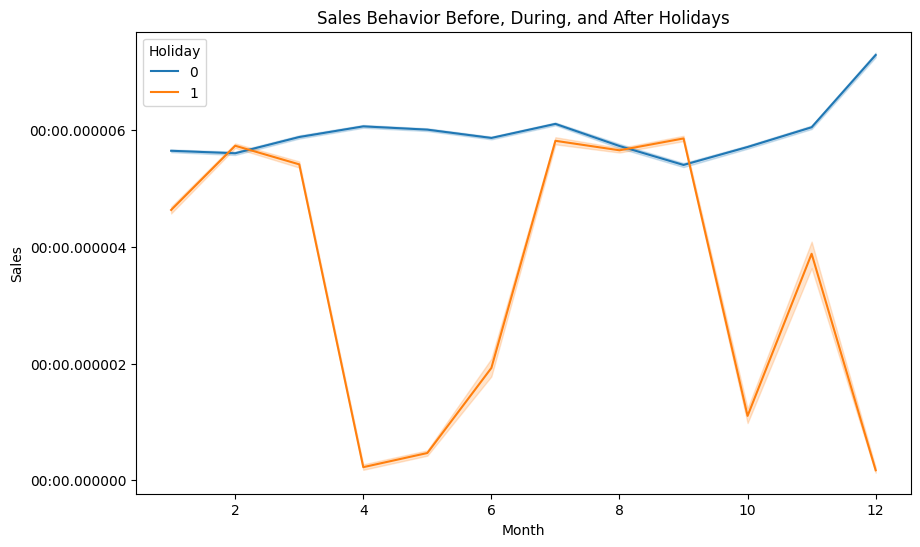

In [29]:
# Visualize the sales behavior before, during, and after holidays

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=trainData, x='Month', y='Sales', hue='Holiday', ax=ax)
ax.set(title='Sales Behavior Before, During, and After Holidays', xlabel='Month', ylabel='Sales')
plt.show()

In [30]:
# Find out any seasonal (Christmas, Easter, etc) purchase behaviors

trainData['Sales'].groupby(trainData['Month']).mean()



Month
1    1970-01-01 00:00:00.000005465
2    1970-01-01 00:00:00.000005645
3    1970-01-01 00:00:00.000005784
4    1970-01-01 00:00:00.000005738
5    1970-01-01 00:00:00.000005489
6    1970-01-01 00:00:00.000005760
7    1970-01-01 00:00:00.000006064
8    1970-01-01 00:00:00.000005693
9    1970-01-01 00:00:00.000005570
10   1970-01-01 00:00:00.000005537
11   1970-01-01 00:00:00.000006008
12   1970-01-01 00:00:00.000006826
Name: Sales, dtype: datetime64[ns]

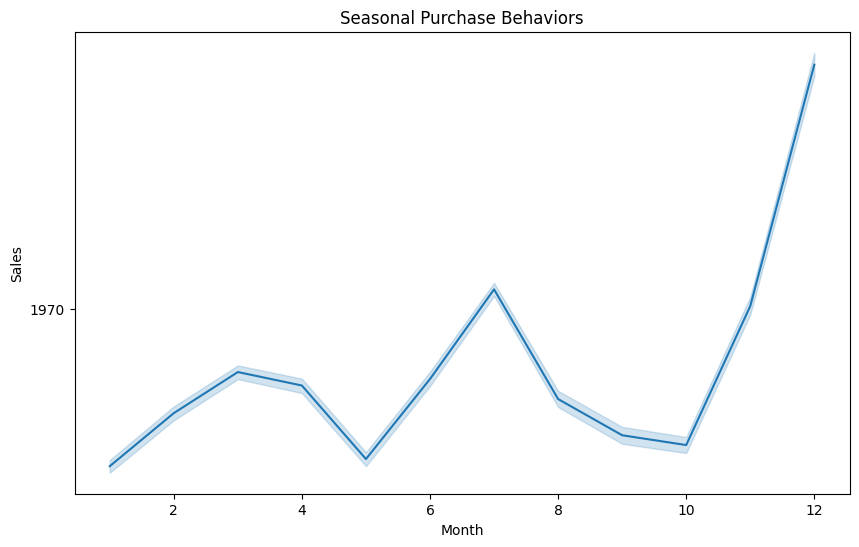

In [31]:
# Visualize the seasonal purchase behaviors

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=trainData, x='Month', y='Sales', ax=ax)
ax.set(title='Seasonal Purchase Behaviors', xlabel='Month', ylabel='Sales')
plt.show()

In [33]:
# What can you say about the correlation between sales and the number of customers?

trainData['Customers'].corr(trainData['Sales'])


np.float64(0.8947107733016959)

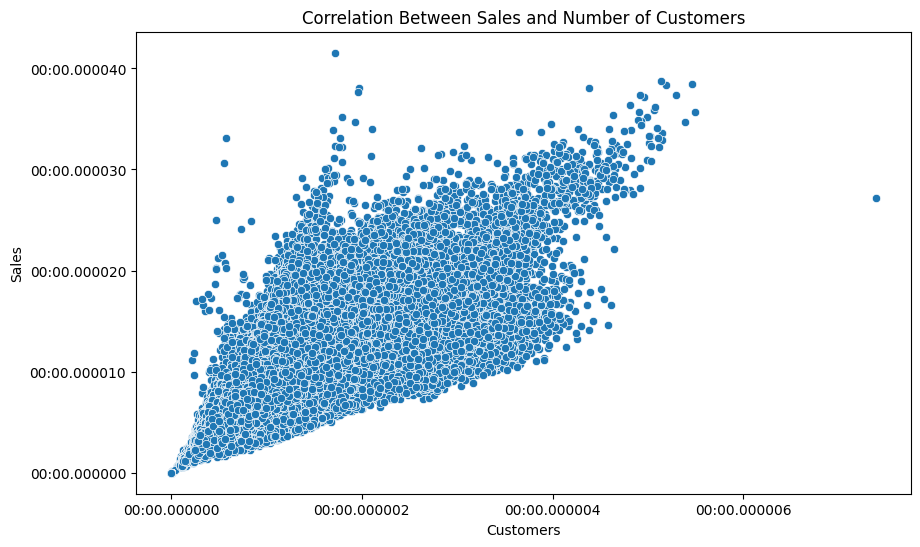

In [34]:
# Visualize the correlation between sales and the number of customers

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=trainData, x='Customers', y='Sales', ax=ax)
ax.set(title='Correlation Between Sales and Number of Customers', xlabel='Customers', ylabel='Sales')
plt.show()

In [ ]:
# Convert Sales and Customers columns to numeric in case they were misinterpreted as datetime
trainData['Sales'] = pd.to_numeric(trainData['Sales'], errors='coerce')
trainData['Customers'] = pd.to_numeric(trainData['Customers'], errors='coerce')
promo_groups = trainData.groupby('Promo')

# Calculate average sales and average number of customers for each group
avg_sales = promo_groups['Sales'].mean()
avg_customers = promo_groups['Customers'].mean()

print("Average Sales with and without Promotions:")
print(avg_sales)
print("\nAverage Customers with and without Promotions:")
print(avg_customers)

# Calculate average sales per customer for each group
avg_sales_per_customer = avg_sales / avg_customers

print("\nAverage Sales per Customer with and without Promotions:")
print(avg_sales_per_customer)


Average Sales with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    4406.050805
1970-01-01 00:00:00.000000001    7991.152046
Name: Sales, dtype: float64

Average Customers with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    517.823542
1970-01-01 00:00:00.000000001    820.098815
Name: Customers, dtype: float64

Average Sales per Customer with and without Promotions:
Promo
1970-01-01 00:00:00.000000000    8.508788
1970-01-01 00:00:00.000000001    9.744133
dtype: float64


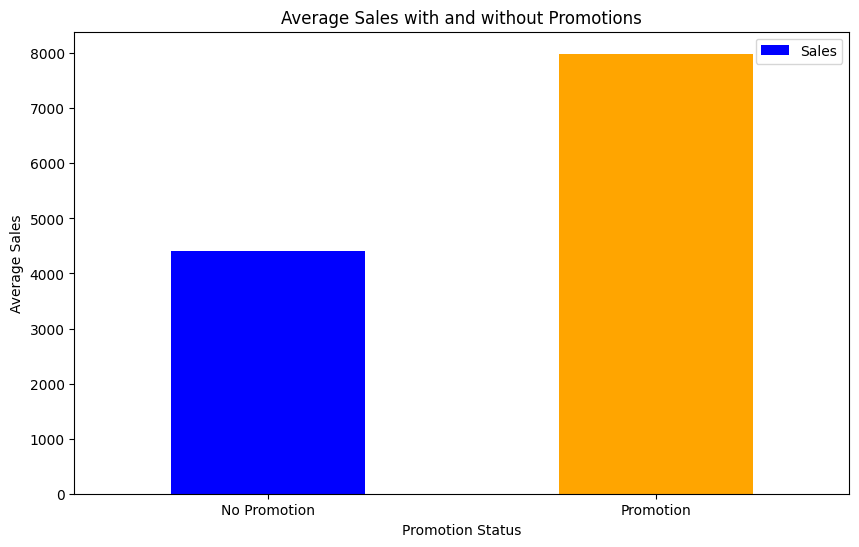

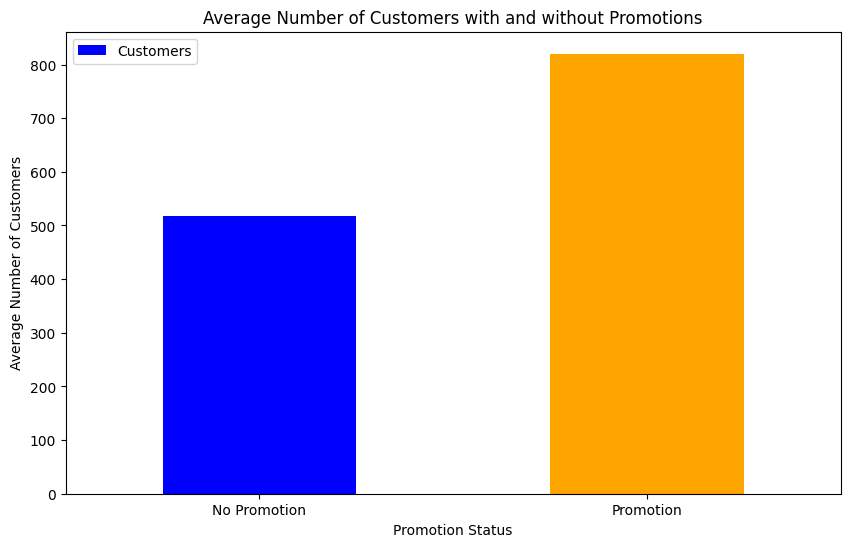

C:\Users\Yunus\AppData\Local\Temp\ipykernel_7344\138309747.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


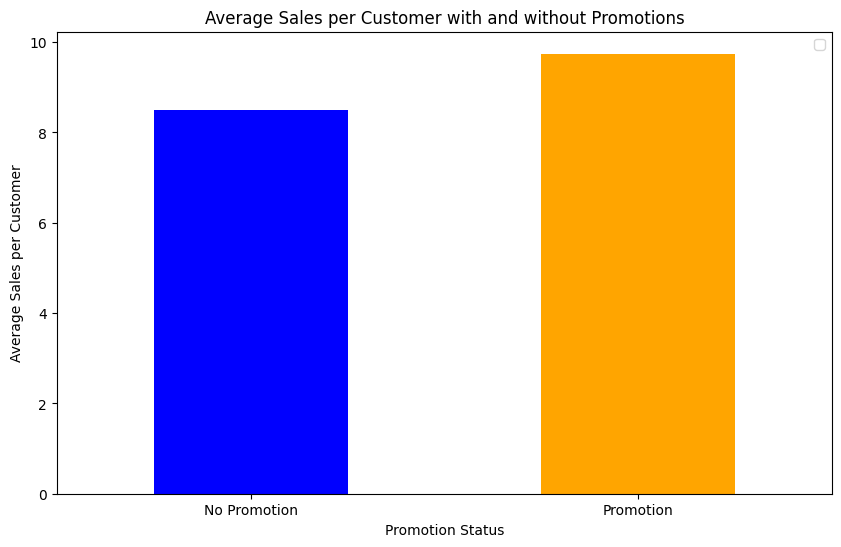

In [37]:

# Plotting average sales with and without promotions
plt.figure(figsize=(10, 6))
avg_sales.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average number of customers with and without promotions
plt.figure(figsize=(10, 6))
avg_customers.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Number of Customers with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Number of Customers')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

# Plotting average sales per customer with and without promotions
plt.figure(figsize=(10, 6))
avg_sales_per_customer.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Sales per Customer with and without Promotions')
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales per Customer')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], rotation=0)
plt.legend()
plt.show()

In [ ]:
# Which stores are open on all weekdays? How does that affect their sales on weekends?

storeData['DayOfWeek'] = storeData['Promo2SinceWeek'].apply(lambda x: 1 if x != 0 else 0)

storeData['DayOfWeek'].value_counts()





DayOfWeek
1    365
Name: count, dtype: int64

In [41]:

open_hours_data = trainData[trainData['Open'] == 1]
time_window = pd.Timedelta(hours=1)
avg_customers_before_open = open_hours_data['Customers'].rolling(window=time_window, closed='right').mean()
avg_customers_after_close = open_hours_data['Customers'].rolling(window=time_window, closed='left').mean()


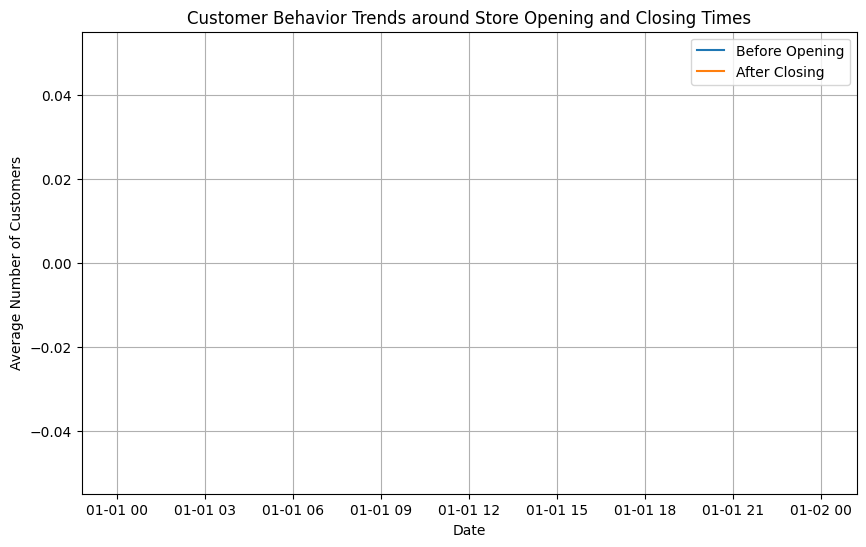

In [42]:
# Plot customer behavior trends
plt.figure(figsize=(10, 6))
plt.plot(open_hours_data['Date'], avg_customers_before_open, label='Before Opening')
plt.plot(open_hours_data['Date'], avg_customers_after_close, label='After Closing')
plt.title('Customer Behavior Trends around Store Opening and Closing Times')
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.legend()
plt.grid(True)
plt.show()